# 2.3 캐글 신용카드 사기 검출

In [1]:
#p.45 패키지와 모튤 설명

#모델의 성능을 평가하기 위한 패키지를 불러들임
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#data set을 training set과 test set으로 분리할 서브패키지 불러들임
#아래 코드에서 혹시 에러 나는 경우 아나콘다 프롬프트에서
#pip install -U scikit-learn 명령어를 쳐서 scikit-learn버전 업데이트하고 jupyter notebook 실행
from sklearn.model_selection import train_test_split

#의사 결정 트리 알로리즘 서브 패키지를 불러들임
from sklearn.tree import DecisionTreeClassifier

#의사결정 graph 그리기 위해

from sklearn import tree #구조 그려줌

#이미지를 받아서 그려줌
from IPython.display import Image

import pydotplus

#os의 path를 가져오기 위해
import os

### (1) card데이터 불러오기
- Time 칼럼은 신용카드 거래 완료까지 걸린 시간으로 큰 의미가 없으므로 삭제
- Amount 칼럼은 신용카드 거래 금액
- Class는 0인 경우 정상 1인 경우 사기
- 대부분의 데이터가 정상 거래임

In [2]:
card_df = pd.read_csv("./data/creditcard.csv")
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


Time 칼럼은 신용카드 거래 완료까지 걸린 시간으로 큰 의미가 없으므로 삭제

In [3]:
#card_df데이터 프레임을 복사해서 df_copy에 대입
df_copy = card_df.copy()
#df_copy에서 Time칼럼을 삭제
#axis : 열방향, inplace = True 삭제한 결과를 df_copy 데이터 프레임에 적용
df_copy.drop("Time", axis = 1, inplace = True)
df_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


data정보보기

In [4]:
df_copy.info() #class칼럼은 정수고 나머지 칼럼은 실수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26       284807 non-null float64
V27  

각 칼럼의 결측치 확인

In [5]:
df_copy.isnull().sum() #각 칼럼의 결측치 없음

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
#df_copy의 모든줄, 0번째칸부터 마지막 칸 미만을 X_feature에 대입 : column index를 사용할 수 있는 iloc을 이용
#Class칸을 제외한 칼럼이 리턴
X_feature = df_copy.iloc[:, :-1]
X_feature.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [7]:
#모든줄의 마지막 칸을 y_target에 대입
#class칸의 데이터가 대입
y_target = df_copy.iloc[:, -1]
y_target.head(3)

0    0
1    0
2    0
Name: Class, dtype: int64

In [8]:
#y_target에서 데이터의 개수를 조회 : value_counts()
#0은 정상거래
#1은 사기
#대부분의 데이터가 정상 거래임
y_target.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
#전체줄 조회
len(y_target)

284807

In [10]:
#데이터의 개수를 전체 줄의 수로 나누고 100을 곱해서 정상거래와 사기 비율을 조회
y_target.value_counts()/len(y_target)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [11]:
#train_test_split()으로 학습과 테스트 데이터 분할
#전체중 테스트 데이터의 비율은 30% test_size = 0.3
#y_target데이터의 거래 종류의 비율은 그대로 학습데이터와 테스트 데이터 분할 stratify = y_target
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size = 0.3, stratify = y_target)

In [12]:
print("학습할 데이터의 거래 종류 비율")
print(y_train.value_counts()/len(y_train)*100)

학습할 데이터의 거래 종류 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64


In [13]:
print("테스트 데이터의 거래 종류 비율")
print(y_test.value_counts()/len(y_test)*100)

테스트 데이터의 거래 종류 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


의사결정 나무 모델 적용

In [14]:
dt_clf = DecisionTreeClassifier()

In [15]:
dt_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
dt_clf = dt_clf.fit(X_train, y_train)

In [17]:
dt_prediction = dt_clf.predict(X_test)

In [18]:
print(confusion_matrix(y_test, dt_prediction, labels=[1, 0]))

[[  107    41]
 [   39 85256]]


정확성, 정밀도, 재현율, F1, AUC값 도출

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

In [20]:
accuracy = accuracy_score(y_test, dt_prediction)
precision = precision_score(y_test, dt_prediction)
recall = recall_score(y_test, dt_prediction)
f1 = f1_score(y_test, dt_prediction)

#ROC-AUC 추가
roc_auc = roc_auc_score(y_test, dt_prediction)
print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f},\t F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision,recall,f1,roc_auc))

정확도:0.9991, 정밀도:0.7329, 재현율:0.7230,	 F1:0.7279, AUC:0.8613


### p.85부터 )20190718

In [24]:
#한쪽에만 값이 치우친 column확인(보통 6을 넘어가면 편향 정도가 크다!)
card_df.skew() #V28과 Amount가 값이 큼

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

In [25]:
card_df.describe() #V28과 Amount가 편향돼있어서 전처리 필요 -> log취하기 전에 최솟값이 음수인지 확인

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [29]:
card_df["V28"].min() #음수이므로 양수로 변환 필요
min_v28 = card_df["V28"].min()*-1 #양수로 변환

In [39]:
plus_28 = np.log1p(card_df["V28"] + min_v28)
df_copy02.insert(0, "V28_plus", plus_28)

In [38]:
df_copy02.drop(["V28"], axis = 1, inplace = True)

(array([2.84395e+05, 3.60000e+02, 3.60000e+01, 1.00000e+01, 2.00000e+00,
        1.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0.   ,  2569.116,  5138.232,  7707.348, 10276.464, 12845.58 ,
        15414.696, 17983.812, 20552.928, 23122.044, 25691.16 ]),
 <a list of 10 Patch objects>)

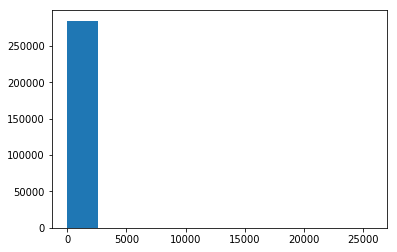

In [21]:
import matplotlib.pyplot as plt
plt.hist(card_df["Amount"]) #거래 금액이 굉장히 편향돼있음 -> 데이터 전처리 필요(조금 평평하게)

In [34]:
#df_copy02에 df_copy data를 새로 복사
df_copy02 = df_copy.copy()

#np의 log1p를 이용하여 Amount를 로그 변환 
#log1p(x) = log(1+x)를 사용하는 이유 : x값이 0이면 log 0은 음의 무한대로 발산하기 때문
amount_n = np.log1p(df_copy02["Amount"])

### 필기 참고(공분산, 상관계수 계산하기)

In [40]:
x1 = np.array([1,2, 3, 4, 5])

In [41]:
x2 = np.array([100, 200, 300, 400, 500])

In [42]:
df = pd.DataFrame(data = {"X1" : x1, "X2" : x2})

In [43]:
df

,X1,X2
0,1,100
1,2,200
2,3,300
3,4,400
4,5,500


In [46]:
#공분산 구하기
df["X1"].cov(df["X2"])

250.0

In [47]:
df["X1"].corr(df["X2"])

0.9999999999999998

### card_df의 전체 상관계수 

In [49]:
corr = card_df.corr()

In [50]:
corr["Class"] #Class와 다른 변수 간의 상관관계 : V14와 V17이 다른 변수들에 비해 상관관계가 높음 -> V14와 V17의 이상치 제거 필요

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64

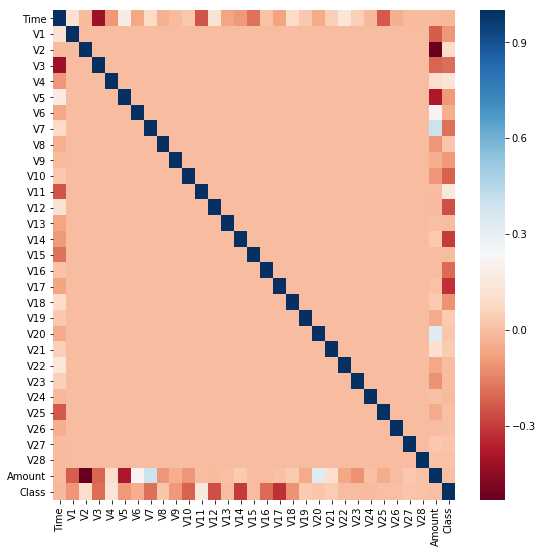

In [51]:
#각 colum간의 상관관계 그래프 그리기
import seaborn as sns

plt.figure(figsize = (9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap="RdBu") #class와 V14, V17이 다른 변수에 비해 상관관계가 강함 -> 이상치 제거 필요

### p.86) 이상치 제거하기
- V14와 V17은 데이터에 대한 사전정보가 없으므로 통계적인 방법으로 제거

In [53]:
#fraud에 해당하는 column 데이터만 추출, 1/4분위와 3/4분위 지점을 np.percentile로 구함
fraud = card_df[card_df["Class"] == 1]["V14"]

quauntile_25 = np.percentile(fraud.values, 25)
quauntile_75 = np.percentile(fraud.values, 75)

#IQR을 구하고, IQR에 1.5를 곱하여 최댓값과 최솟값 지점을 구함
iqr = quauntile_75 - quauntile_25
iqr_weight = iqr * 1.5
lowest_val = quauntile_25 - iqr_weight
highest_val = quauntile_75 + iqr_weight

#최대값 보다 크거나, 최소값보다 작은 값을 아웃라이어로 설정하고, DataFrame Index 반환
outlier_index = fraud[(fraud < lowest_val) |(fraud > highest_val)].index

In [54]:
print("이상치 데이터 인덱스 : ", outlier_index)

이상치 데이터 인덱스 :  Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [55]:
df_copy02.drop(outlier_index, axis = 0, inplace =True)
df_copy02

,V28_plus,V28_plus_p,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2.797832,2.797832,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2.800010,2.800010,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2.795471,2.795471,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,2.802848,2.802848,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.812124,2.812124,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.804037,2.804037,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,2.799429,2.799429,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,2.730773,2.730773,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,2.807744,2.807744,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,2.804158,2.804158,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [68]:
X_features = df_copy02.iloc[:, :-1]
y_target = df_copy02.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_target, test_size = 0.3, stratify = y_target)

dt_clf = dt_clf.fit(X_train, y_train)
dt_prediction = dt_clf.predict(X_test)
print(confusion_matrix(y_test, dt_prediction, labels = [1, 0]))

accuracy = accuracy_score(y_test, dt_prediction)
precision = precision_score(y_test, dt_prediction)
recall = recall_score(y_test, dt_prediction)
f1 = f1_score(y_test, dt_prediction)

#ROC-AUC 추가
roc_auc = roc_auc_score(y_test, dt_prediction)
print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f},\t F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision,recall,f1,roc_auc))

[[  108    38]
 [   37 85258]]
정확도:0.9991, 정밀도:0.7448, 재현율:0.7397,	 F1:0.7423, AUC:0.8696


## p.89 SMOTE 오버 샘플링(필기참고)
SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

In [61]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ", X_train.shape, y_train.shape)
print("SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : ", X_train_over.shape, y_train_over.shape)
print("SMOTE 적용 후 레이블 값 분포 : \n", pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (199362, 31) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :  (398040, 31) (398040,)
SMOTE 적용 후 레이블 값 분포 : 
 1    199020
0    199020
dtype: int64


In [62]:
dt_clf = dt_clf.fit(X_train_over, y_train_over)

In [65]:
dt_prediction = dt_clf.predict(X_test)
print(confusion_matrix(y_test, dt_prediction, labels = [1, 0]))

[[  109    37]
 [  155 85140]]


In [66]:
accuracy = accuracy_score(y_test, dt_prediction)
precision = precision_score(y_test, dt_prediction)
recall = recall_score(y_test, dt_prediction)
f1 = f1_score(y_test, dt_prediction)

#ROC-AUC 추가
roc_auc = roc_auc_score(y_test, dt_prediction)
print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f},\t F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision,recall,f1,roc_auc))

정확도:0.9978, 정밀도:0.4129, 재현율:0.7466,	 F1:0.5317, AUC:0.8724


난수 생성(때마다 다른 수 생성)

In [69]:
np.random.rand(5)

array([0.90913777, 0.85582023, 0.35766544, 0.7067524 , 0.94848644])

In [70]:
np.random.rand(5)

array([0.01938592, 0.08609231, 0.50308001, 0.64626105, 0.71800401])

In [78]:
#seed 값을 줘서 난수가 항상 같은 값이 뽑히게 함
np.random.seed(0)
np.random.rand(5)

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ])

In [72]:
np.random.rand(5) 

array([0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152])

In [73]:
np.random.seed(0)
np.random.rand(5)

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ])

In [74]:
np.random.rand(5)

array([0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152])